In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the csv file
df=pd.read_csv("C:/Users/ADMIN/Downloads/train.csv")
import warnings
warnings.filterwarnings("ignore")

In [4]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

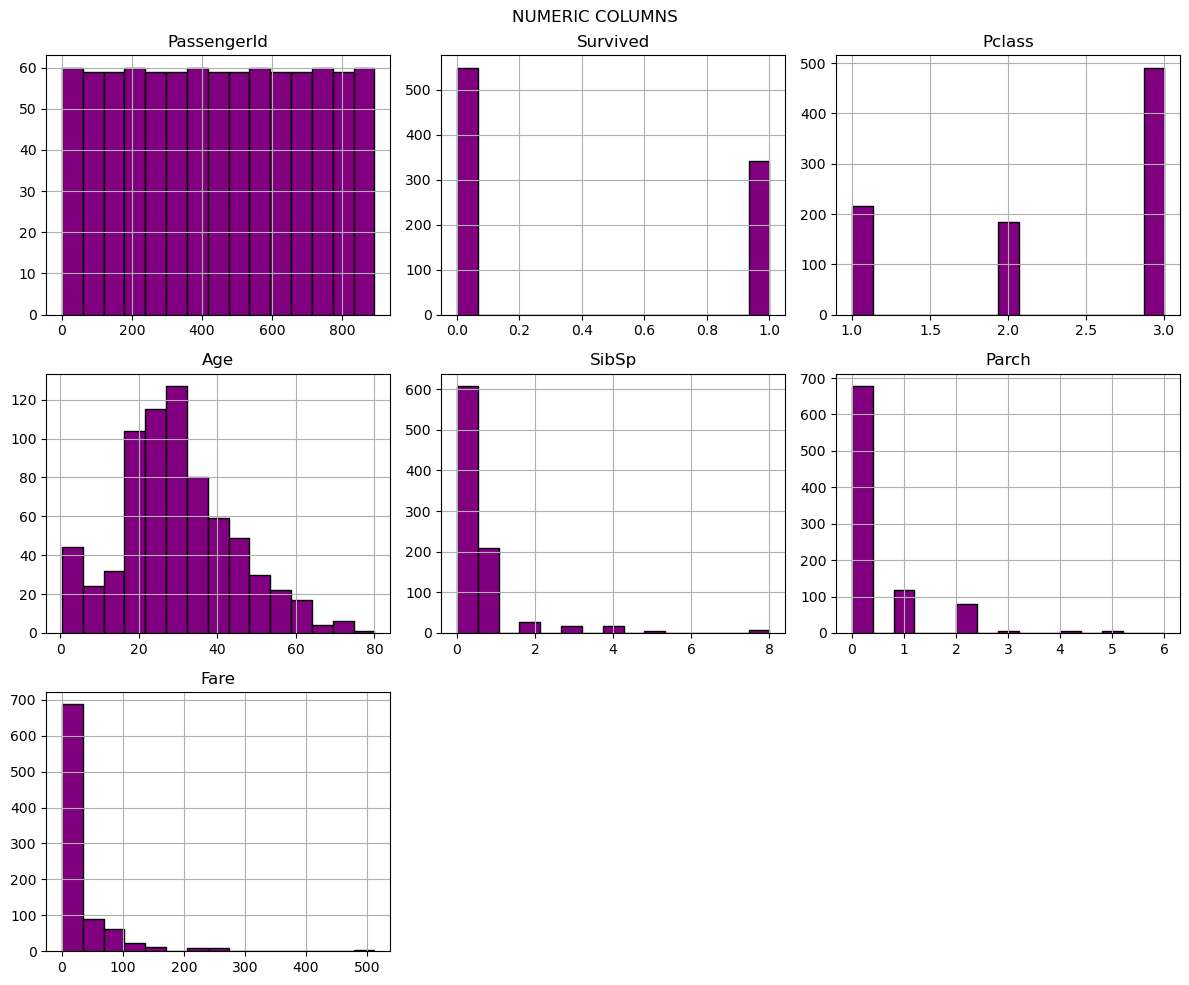

In [5]:
#  QUESTION 1
# HISTOGRAM FOR NUMERIC COLUMN
numerical_df=df.select_dtypes(include=['int64'])
df.hist(bins=15,figsize=(12,10),color='purple',edgecolor='black')
plt.suptitle('NUMERIC COLUMNS')
plt.tight_layout()
plt.show()

In [8]:
import seaborn as sns

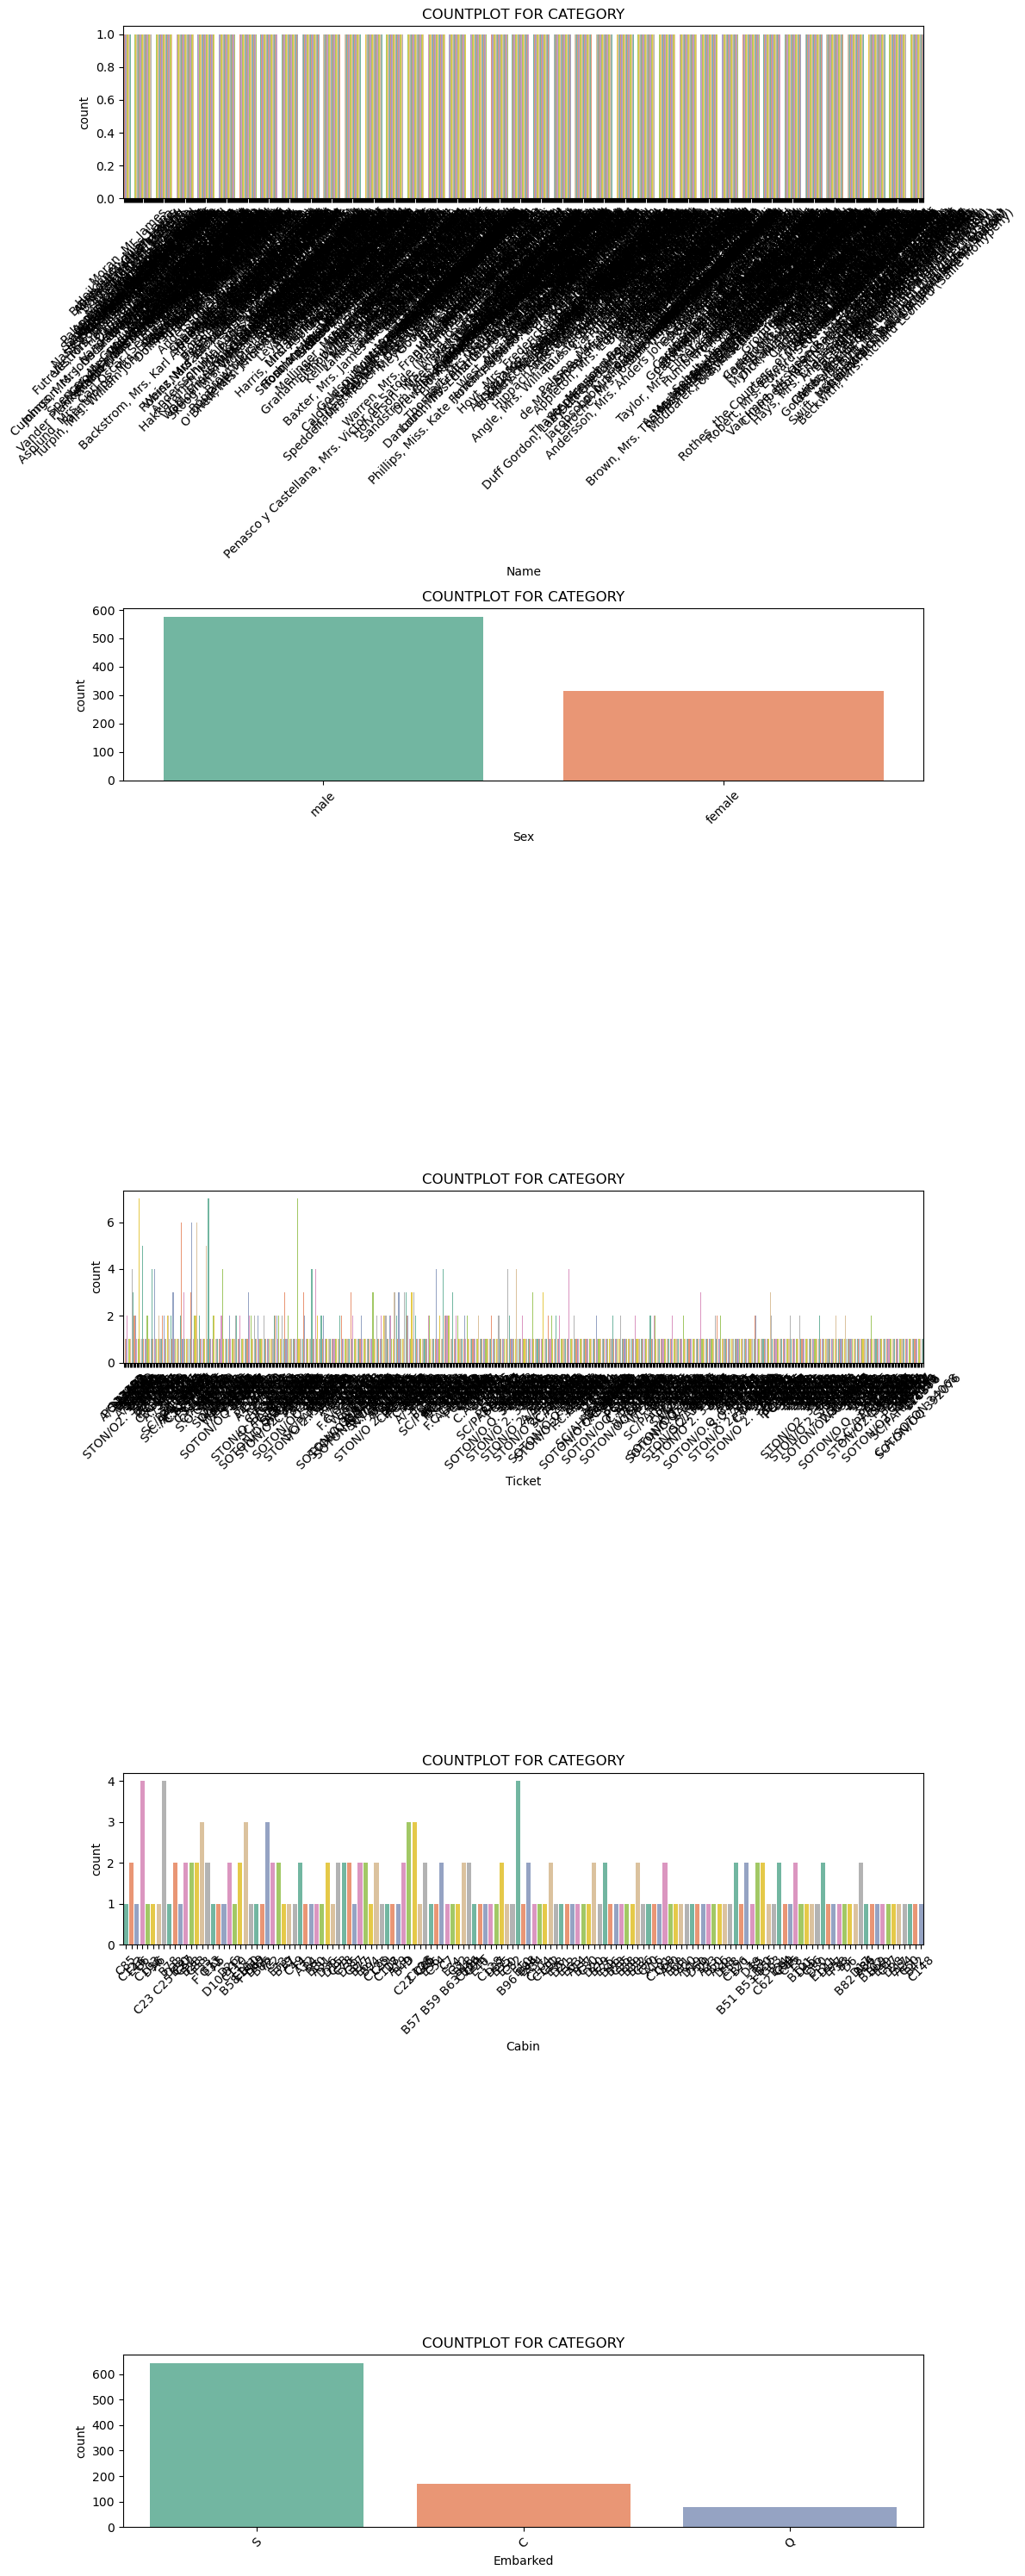

In [9]:
# QUESTION 2
# countplot categorical columns
import matplotlib.pyplot as plt

# call out categorical columns alone
cat_cols = df.select_dtypes(include=['object','category']).columns

# determine figure size
fig, axes = plt.subplots(
    nrows=len(cat_cols),
    ncols=1,
    figsize=(12, len(cat_cols) * 6)  
)




for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)  
    sns.countplot(x=col,hue=col, data=df, palette='Set2',legend=False)
    plt.title('COUNTPLOT FOR CATEGORY')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




In [10]:
# check categorical collumns
print(cat_cols)
print(df.dtypes)



Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


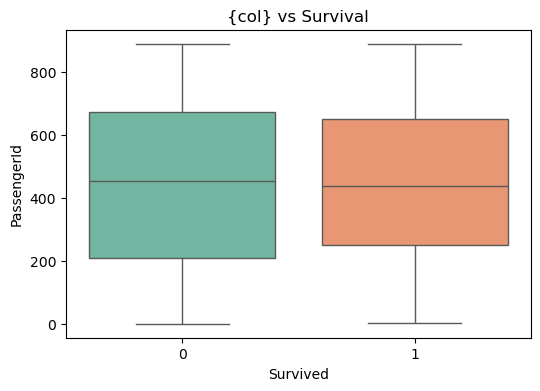

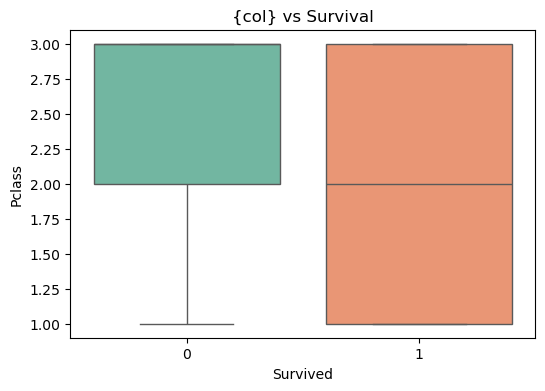

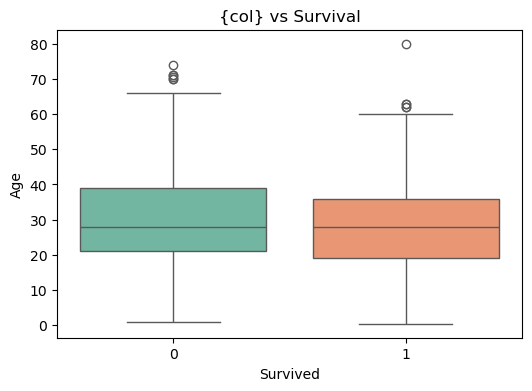

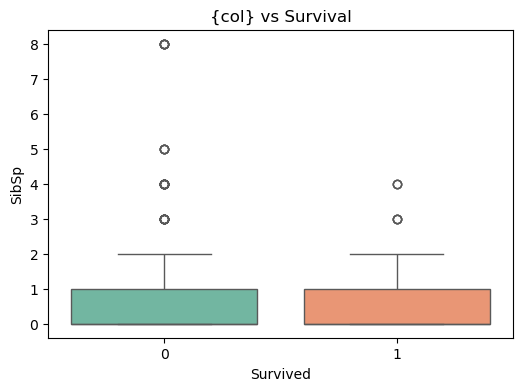

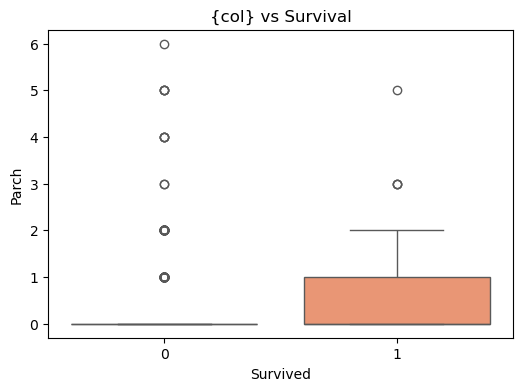

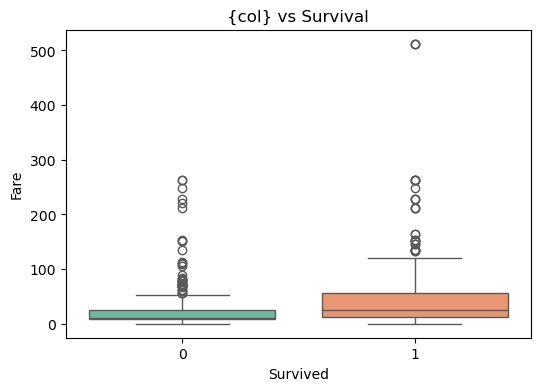

In [11]:
# QUESTION 3
# boxplot for survival vs numeric columns
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove 'Survived' from numeric list
num_cols = num_cols.drop('Survived', errors='ignore')

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x='Survived',
        y=col,
        data=df,
        palette='Set2'
    )
    plt.title('{col} vs Survival')
    plt.show()



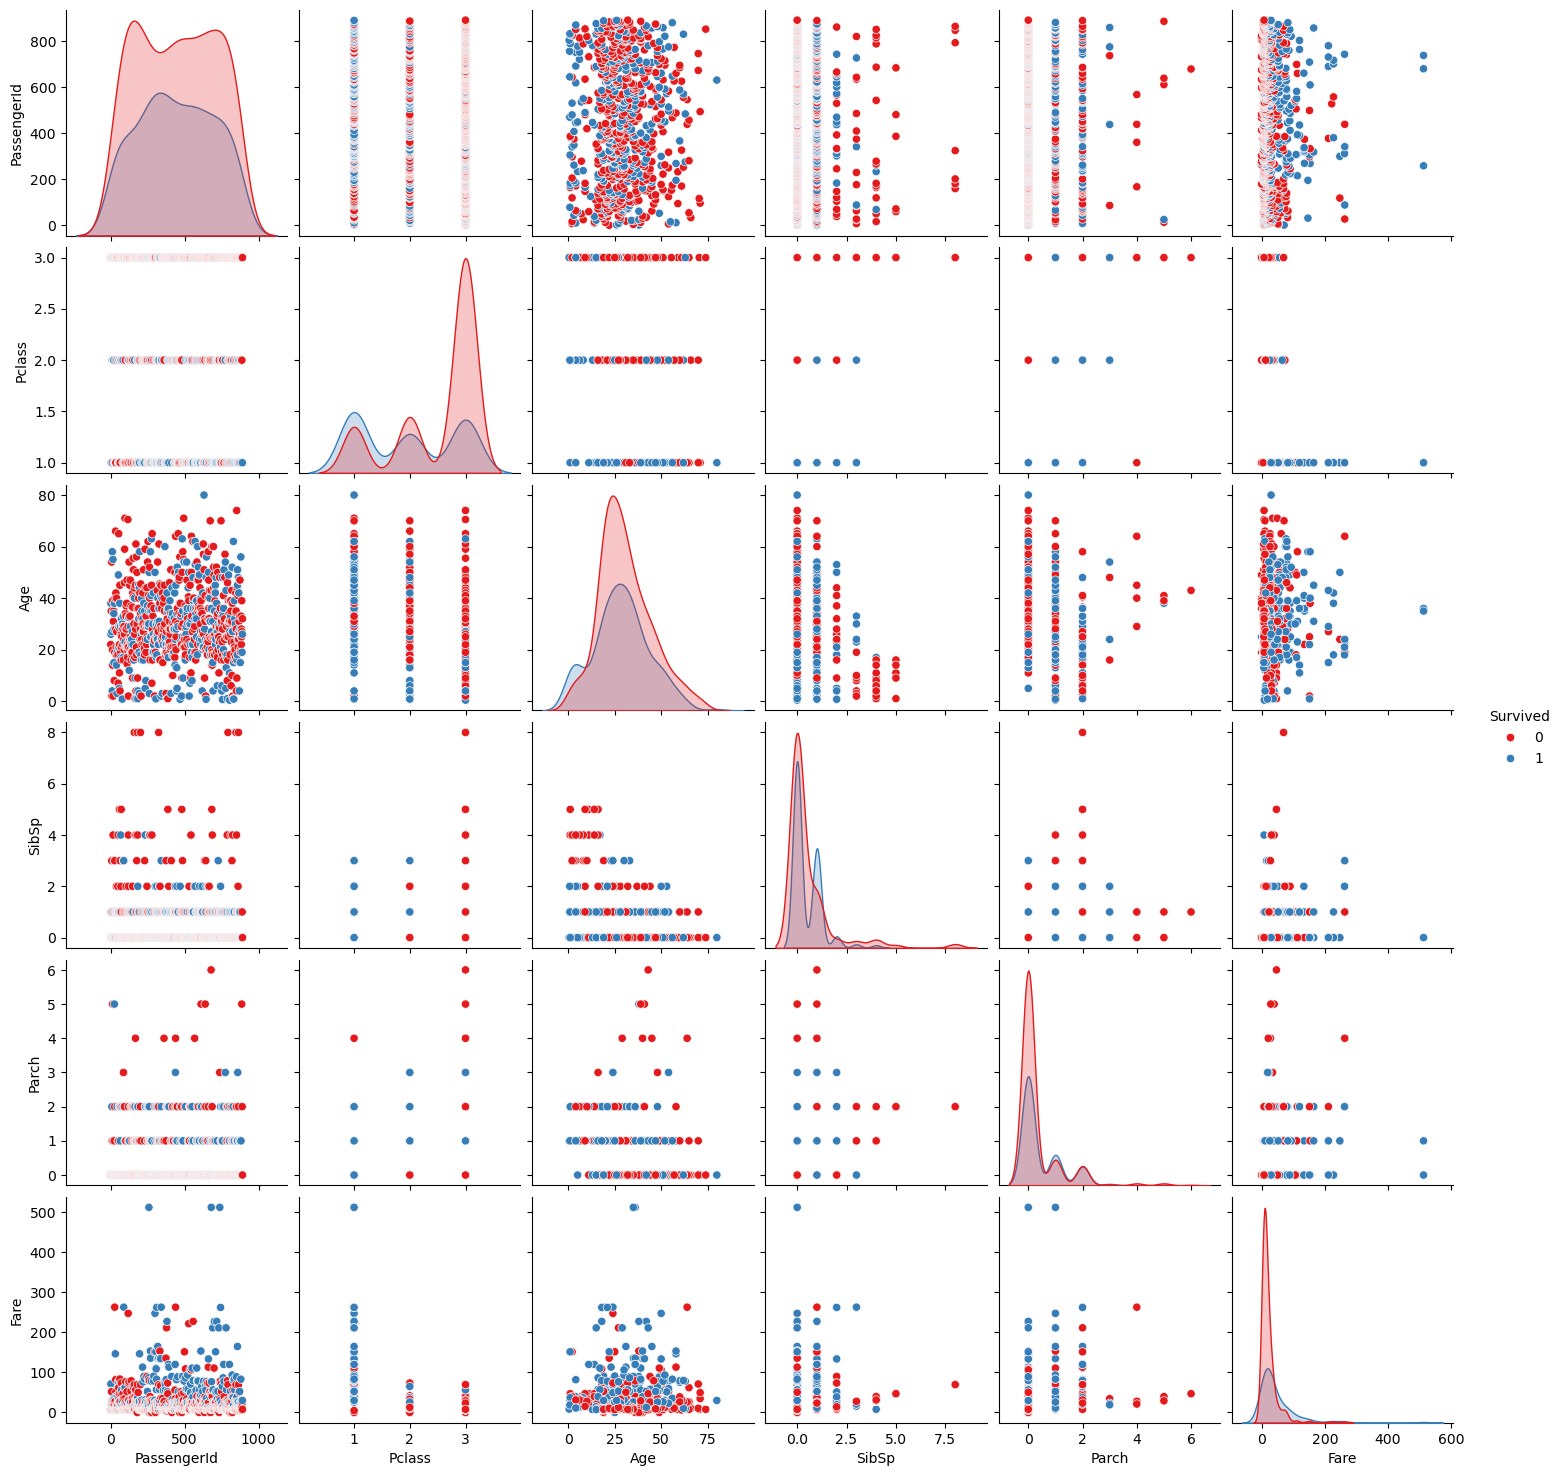

In [12]:
# QUESTION 4
import seaborn as sns

# Make sure Survival is treated as a category for coloring
df['Survived'] = df['Survived'].astype('category')

# Select numerical columns + Survival
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
pairplot_df = df[list(num_cols) + ['Survived']]

# Pairwise scatter plots
sns.pairplot(pairplot_df, hue='Survived', palette='Set1', diag_kind='kde')


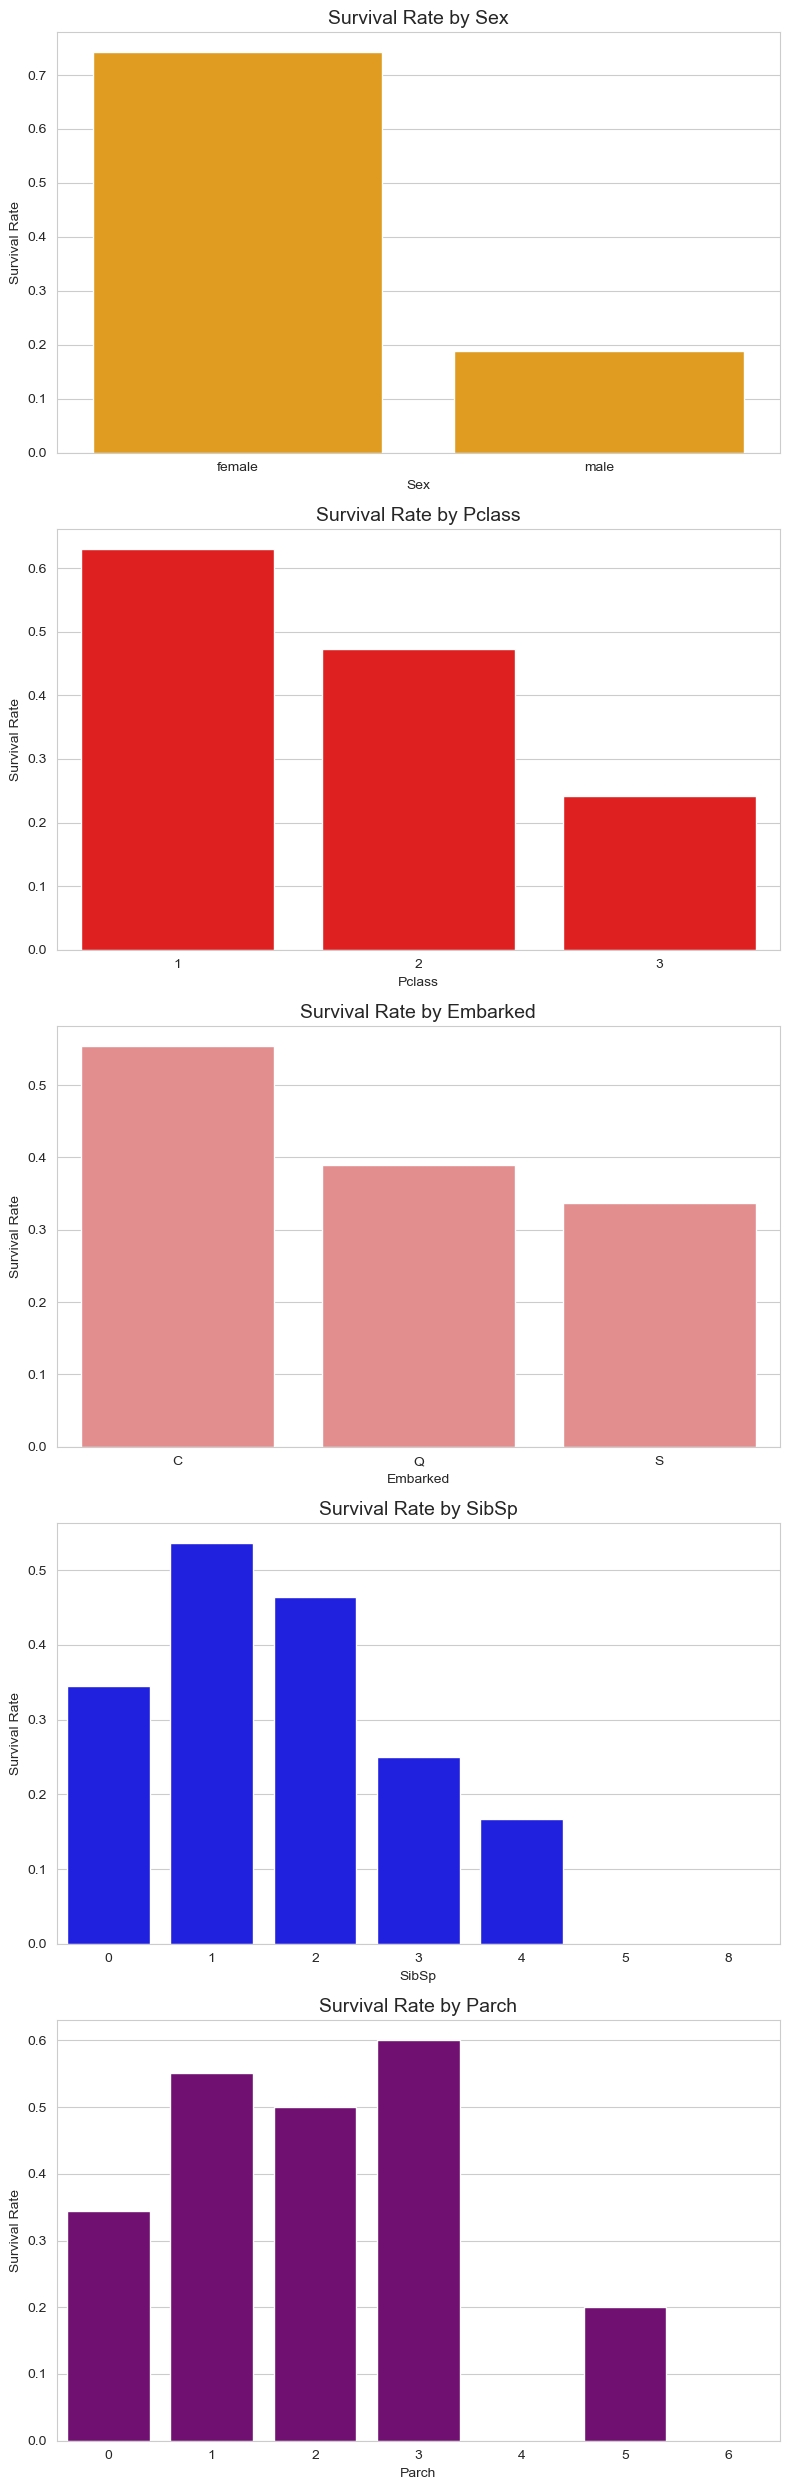

In [16]:
# QUESTION 5 
import seaborn as sns
cat_cols = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
custom_colors = ['orange', 'red', 'lightcoral', 'blue', 'purple']
plt.figure(figsize=(8, 5 * len(cat_cols)))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 1, i + 1)
    survival_rates = df.groupby(col)['Survived'].mean().sort_values(ascending=False)
    sns.barplot(
        x=survival_rates.index,
        y=survival_rates.values,
        color=custom_colors[i % len(custom_colors)]
    )
    plt.title(f'Survival Rate by {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()


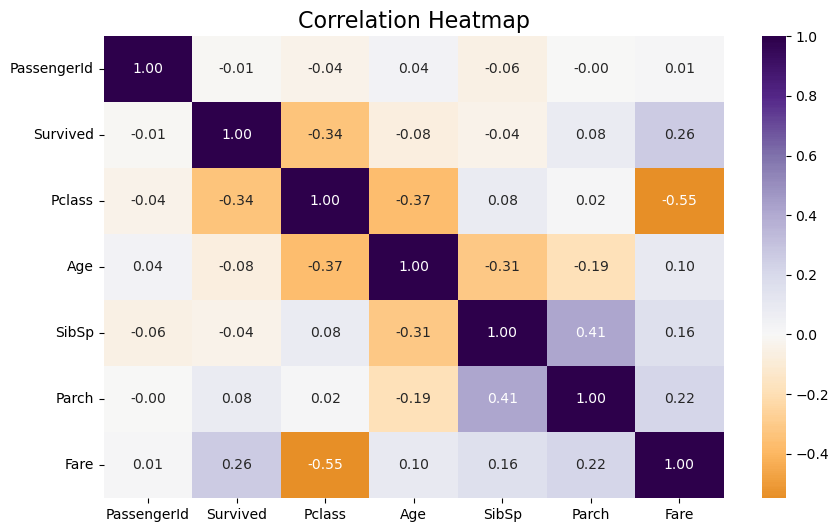

In [38]:
# QUESTION 6
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation only for numeric columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,      
    fmt=".2f",       
    cmap="PuOr", 
    center=0
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()
